# Calendar Spread

To implement this [strategy](https://www.investopedia.com/terms/c/calendarspread.asp), the trader sells a short-term option (either a call or a put) and buys a long-term option of same type, both options with the same strike. As such, it is a debit spread, the maximum loss being the amount paid for the strategy.

**Caveat: Options are very risky derivatives and, like any other type of financial vehicle, trading options requires due diligence. Transactions shown as examples of trading strategies with options in this notebook are not recommendations.**

In [1]:
from __future__ import print_function
import sys
from optionlab import __version__
from optionlab.strategy import Strategy
from numpy import zeros
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print("Python version: %s" % sys.version)
print("optionlab version: %s" % __version__)

Python version: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
optionlab version: 0.1


A *Strategy* object is instantiated.

In [3]:
st=Strategy()

The data used in the calculations is passed to the *getdata()* method of the newly created *Strategy* object.

In this case, the underlying asset is Apple stock (ticker: APPL). We consider the spot price on January 18, 2021. The maturities of the long and short call options were January 29, 2021 and February 12, 2021, respectively.

The cost of the long-term call option was 5.90 whereas the short-term call option was worth a premium of 4.60.

The probability of profit (PoP) was estimated on the target date, which corresponds to the expiration of the short-term call option.

In [4]:
distribution="black-scholes"
stockprice=127.14
volatility=0.427
startdate="2021-01-18"
targetdate="2021-01-29"
interestrate=0.0009
minstock=stockprice-round(stockprice*0.5,2)
maxstock=stockprice+round(stockprice*0.5,2)
strategy=[{"type":"call","strike":127.00,"premium":4.60,"n":1000,"action":"sell"},
          {"type":"call","strike":127.00,"premium":5.90,"n":1000,"action":"buy","expiration":"2021-02-12"}]

st.getdata(stockprice=stockprice,startdate=startdate,targetdate=targetdate,volatility=volatility,interestrate=interestrate,
           minstock=minstock,maxstock=maxstock,strategy=strategy,distribution=distribution)

The calculations are carried out by the *run()* method of the *Strategy* object and the output is stored in a Python dictionary.

In [5]:
%%time
out=st.run()

Wall time: 12.1 ms


Profit/loss profile is obtained via a call to the *getPL()* method and plotted for the calendar spread on the target date.

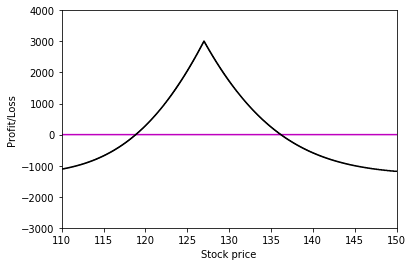

In [6]:
s,pl_total=st.getPL()
zeroline=zeros(s.shape[0])
plt.xlabel("Stock price")
plt.ylabel("Profit/Loss")
plt.xlim(110,150)
plt.ylim(-3000,4000)
plt.plot(s,zeroline,'m-')
plt.plot(s,pl_total,'k-')

Below one can see some useful, additional results of the calculations made for the strategy, including its PoP.

In [7]:
print("Days remaining to the target date: %d" % st.days2target)
print("Maximum loss: %.2f" % abs(out["MinimumReturnInTheDomain"]))
print("Maximum profit: %.2f" % out["MaximumReturnInTheDomain"])
print("Profitable stock price range:")

for profrange in out["ProfitRanges"]:
    print("      %.2f ---> %.2f" % (profrange[0],profrange[1]))

print("Probability of Profit (PoP): %.1f%%" % (out["ProbabilityOfProfit"]*100.0))

Days remaining to the target date: 8
Maximum loss: 1300.00
Maximum profit: 3010.00
Profitable stock price range:
      118.87 ---> 136.15
Probability of Profit (PoP): 62.7%
